In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

In [3]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
client_df['churn'].value_counts()

churn
0    13187
1     1419
Name: count, dtype: int64

Mean of cons_12m is  159220
Mean of cons_gas_12m is  28092
Mean of cons_last_month is  16090


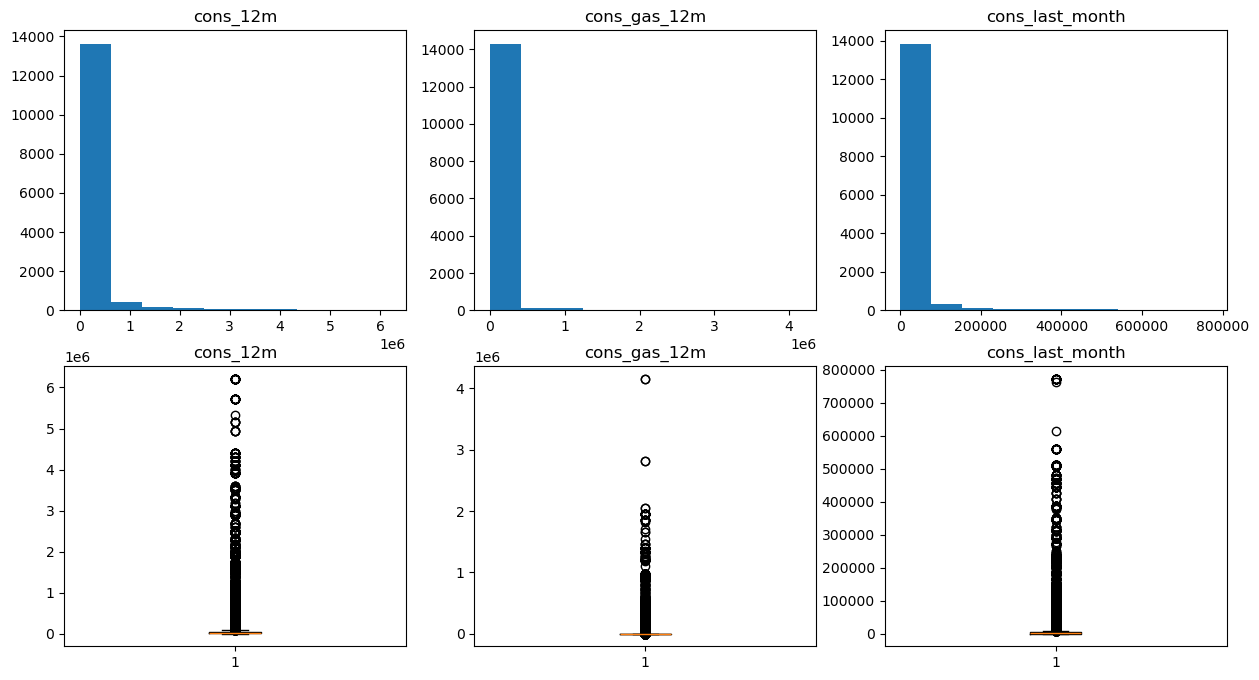

In [6]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
columns = ['cons_12m','cons_gas_12m','cons_last_month']
for i, ax in enumerate(axis.flat):
    if(i<=2):
        ax.set_title(f"{columns[i]}")
        ax.hist(client_df[columns[i]])
        print(f"Mean of {columns[i]} is ", round(client_df[columns[i]].mean()))
    else:
        ax.set_title(f"{columns[i-3]}")
        ax.boxplot(client_df[columns[i-3]])
    
plt.show()

Median of cons_12m =  14116
Median of cons_gas_12m =  0
Median of cons_last_month =  792


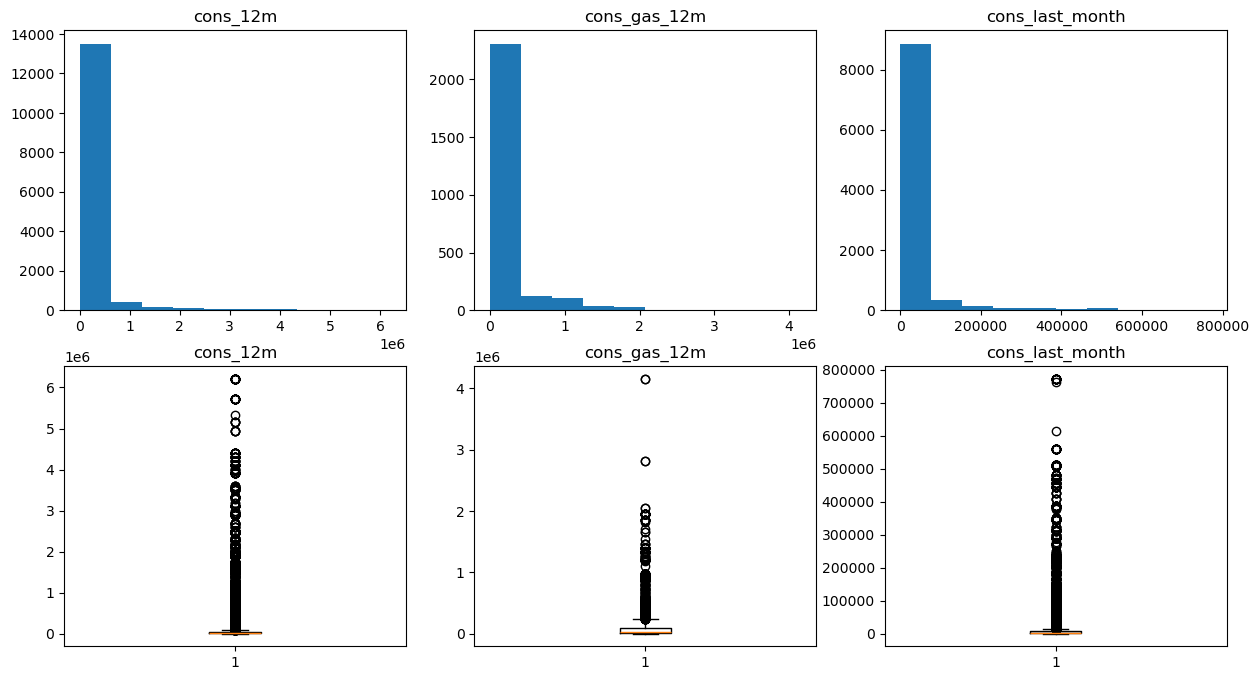

In [7]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
columns = ['cons_12m','cons_gas_12m','cons_last_month']
for i, ax in enumerate(axis.flat):
    if(i<=2):
        ax.set_title(f"{columns[i]}")
        ax.hist(client_df[client_df[columns[i]]>0][columns[i]])
        print(f"Median of {columns[i]} = ",round(client_df[columns[i]].median()))
    else:
        ax.set_title(f"{columns[i-3]}")
        ax.boxplot(client_df[client_df[columns[i-3]]>0][columns[i-3]])
plt.show()

#### Highly skewed data is observed for all of the above three columns
#### `There is a big difference between the Median and mean making it a very right skewed data`

(array([8.0000e+00, 1.4076e+04, 1.5800e+02, 1.3200e+02, 1.6300e+02,
        2.8000e+01, 1.5000e+01, 1.1000e+01, 1.0000e+01, 5.0000e+00]),
 array([ 234. ,  331.8,  429.6,  527.4,  625.2,  723. ,  820.8,  918.6,
        1016.4, 1114.2, 1212. ]),
 <BarContainer object of 10 artists>)

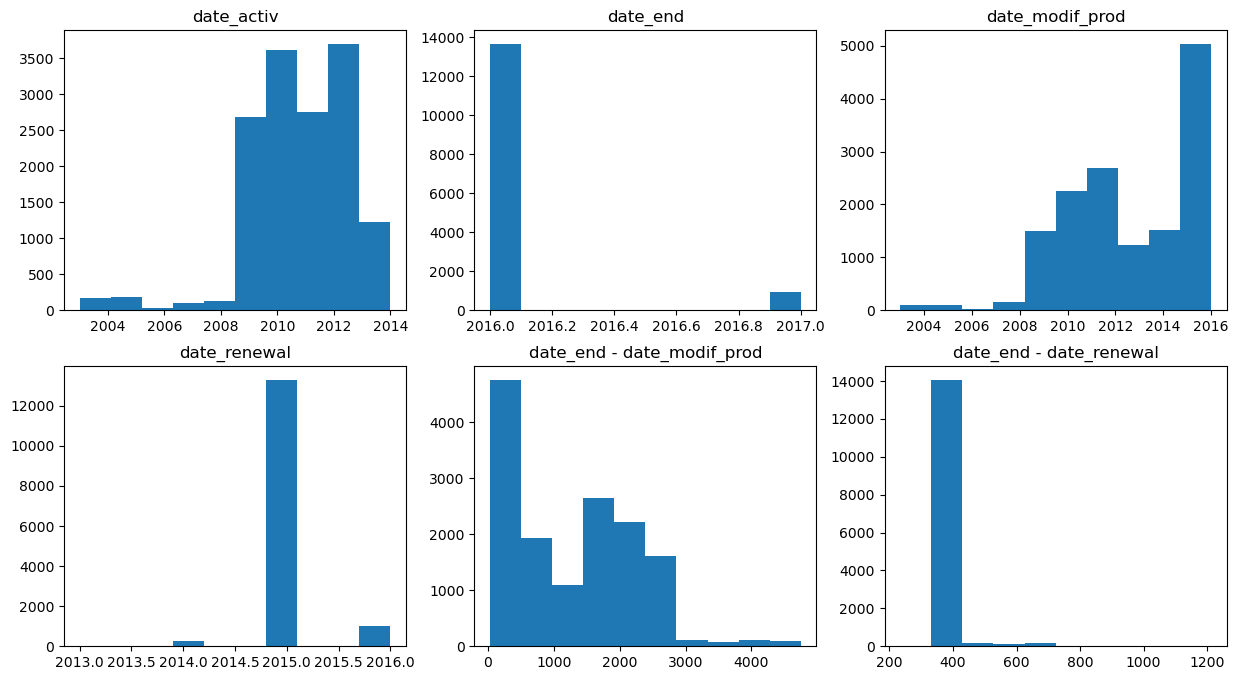

In [8]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize=(15,8))
axis[0,0].set_title("date_activ")
axis[0,0].hist(pd.to_datetime(client_df.date_activ).dt.year)
axis[0,1].set_title("date_end")
axis[0,1].hist(pd.to_datetime(client_df.date_end).dt.year)
axis[0,2].set_title("date_modif_prod")
axis[0,2].hist(pd.to_datetime(client_df.date_modif_prod).dt.year)
axis[1,0].set_title("date_renewal")
axis[1,0].hist(pd.to_datetime(client_df.date_renewal).dt.year)
axis[1,1].set_title("date_end - date_modif_prod")
axis[1,1].hist((pd.to_datetime(client_df.date_end) - pd.to_datetime(client_df.date_modif_prod) ).dt.days)
axis[1,2].set_title("date_end - date_renewal")
axis[1,2].hist((pd.to_datetime(client_df.date_end) - pd.to_datetime(client_df.date_renewal) ).dt.days)


In [9]:
client_df['imp_cons'].value_counts()

imp_cons
0.00      6169
0.30         5
0.10         5
34.53        4
26.26        4
          ... 
10.15        1
368.85       1
78.44        1
695.54       1
46.98        1
Name: count, Length: 7752, dtype: int64

#### we see that there are about 6169 customers who pay zero consumption because they do not cross the margin of minimum consumption 

margin_gross_pow_ele
26.04     258
33.12     238
29.76     170
34.68     161
0.00      157
         ... 
6.93        1
102.04      1
185.85      1
39.30       1
10.06       1
Name: count, Length: 2391, dtype: int64
margin_net_pow_ele
26.04     258
33.12     238
29.76     170
34.68     161
0.00      157
         ... 
57.00       1
6.93        1
102.04      1
185.85      1
10.06       1
Name: count, Length: 2391, dtype: int64


(array([1.2729e+04, 1.4050e+03, 1.8000e+02, 5.6000e+01, 3.9000e+01,
        3.3000e+01, 4.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([3.00000e-02, 3.74910e+01, 7.49520e+01, 1.12413e+02, 1.49874e+02,
        1.87335e+02, 2.24796e+02, 2.62257e+02, 2.99718e+02, 3.37179e+02,
        3.74640e+02]),
 <BarContainer object of 10 artists>)

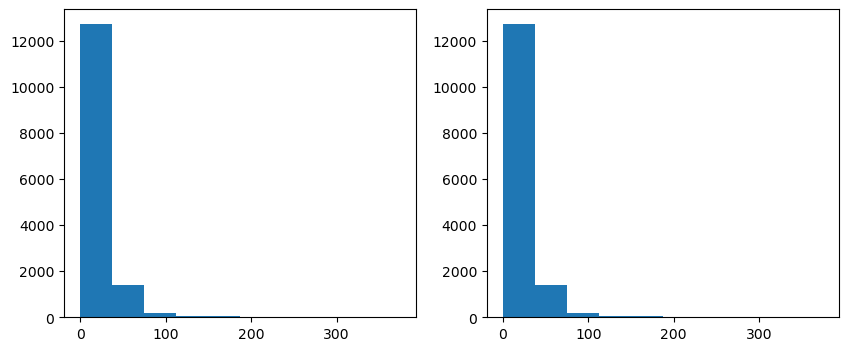

In [10]:
print(client_df.margin_gross_pow_ele.value_counts())
print(client_df.margin_net_pow_ele.value_counts())
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
axis[0].hist(client_df[client_df.margin_gross_pow_ele>0].margin_gross_pow_ele)
axis[1].hist(client_df[client_df.margin_net_pow_ele>0].margin_net_pow_ele)

#### margin_gross_pow_ele likely represents the profit made on power subscriptions after accounting only for the direct costs of providing the power.
#### margin_net_pow_ele would represent the profit on power subscriptions after considering all associated costs, including indirect costs like administrative expenses, marketing, taxes, etc.

In [11]:
client_df.nb_prod_act.value_counts().sort_index()

nb_prod_act
1     11431
2      2445
3       523
4       150
5        31
6         8
8         4
9        11
10        2
32        1
Name: count, dtype: int64

#### Customers with active products 1 are the highest

num_years_antig
1        1
2       11
3     2433
4     3982
5     2317
6     4769
7      509
8      103
9       92
10      81
11     185
12     110
13      13
Name: count, dtype: int64

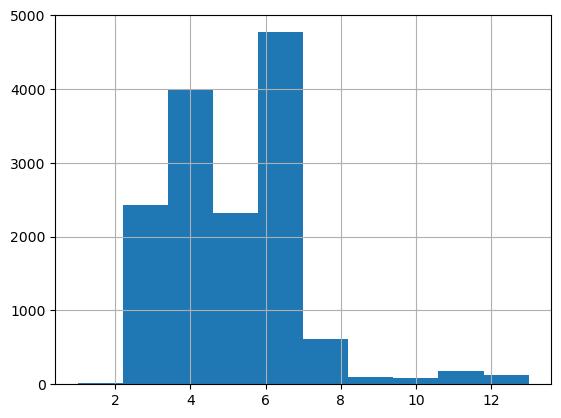

In [12]:
client_df.num_years_antig.hist()
client_df['num_years_antig'].value_counts().sort_index()


In [13]:
print(f"Max value: {client_df.pow_max.max()}, Min value: {client_df.pow_max.min()}")
display(client_df.pow_max.value_counts().sort_values(ascending=False))

Max value: 320.0, Min value: 3.3


pow_max
13.200    2124
10.392    2000
13.856    1504
15.000     583
10.350     480
          ... 
29.565       1
18.830       1
29.050       1
20.750       1
48.078       1
Name: count, Length: 698, dtype: int64

##### ^Subscribed power plan 

In [14]:
client_df.churn.value_counts()[0]/(client_df.churn.value_counts()[0]+client_df.churn.value_counts()[1])

0.9028481445981104

#### We see that there is imbalance in data which may cause bias result.

### Conclusion of EDA 
#### 1.Overall there are significant number of values that are zero in quantitative variables and missing in the case of categorical variables. These will obviously have some effect on the model. This model has no linearity giving us some ideas on what model can facilitate the prediction.

#### 2.
There are some data type change required for the data type field

#### 3.
There are some feature like margins and forecast that can be engineered to reduce dimensionality size

# Price dataset EDA

In [15]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [16]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [17]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [18]:
pd.to_datetime(price_df.price_date).dt.year.value_counts()

price_date
2015    193002
Name: count, dtype: int64

#### all the data is from 2015 year only

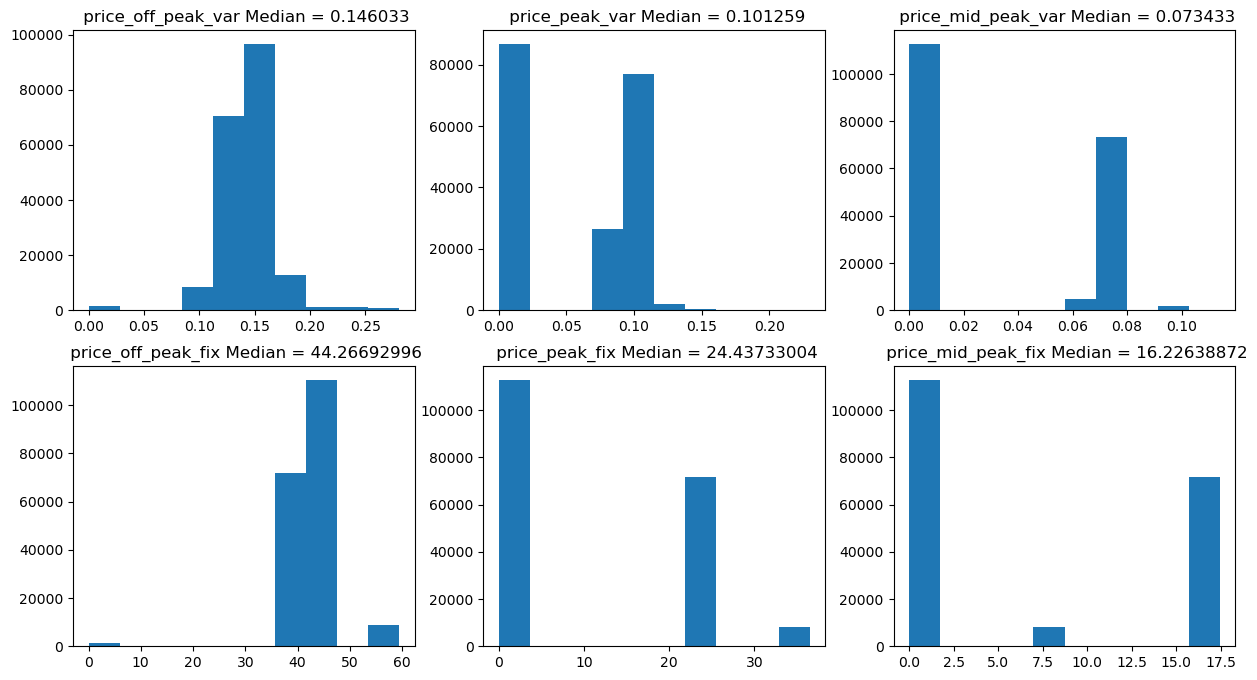

In [19]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
columns = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
for i, ax in enumerate(axis.flat):
    ax.set_title(f" {columns[i]} Median = {price_df[price_df[columns[i]]>0][columns[i]].median()}")
    ax.hist(price_df[columns[i]])
plt.show()

In [20]:
price_df[['id','price_date']].id.value_counts().reset_index()["id"].value_counts()


id
038af19179925da21a25619c5a24b745    1
38c65dc6dd58c71b60dba5e2dbd5730a    1
8bdcd1e4ee19ef24c545d2ca352f7622    1
a2a0075a2e60219306aa8b71068519f8    1
c9c069708535084ed251ff72ebb1b197    1
                                   ..
c2c533cc1462f46f045194fcb0467da6    1
6edcb8e32a2a97981cab50d717966785    1
7406b8f57c3058e7919df5eb84e641ff    1
8e52d9c161c56903b323e72f2535a8cc    1
15b36e47cf04bf151e3f4438d12672e5    1
Name: count, Length: 16096, dtype: int64

In [21]:
price_df[price_df.id=="038af19179925da21a25619c5a24b745"]   


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.0,0.0,44.266930,0.0,0.0
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.0,0.0,44.444710,0.0,0.0
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.0,0.0,44.444710,0.0,0.0
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.0,0.0,44.444710,0.0,0.0
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.0,0.0,44.444710,0.0,0.0


In [22]:
client_df[client_df.id == '038af19179925da21a25619c5a24b745'][['forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak']]

,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
11047,0.14398,0.0,44.311378


In [23]:
price_df[price_df.id=="bf89f2d8c1b133a134fd93603cb4c947"]   


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
84810,bf89f2d8c1b133a134fd93603cb4c947,2015-06-01,0.133958,0.000000,0.000000,37.891254,0.00000,0.000000
84811,bf89f2d8c1b133a134fd93603cb4c947,2015-07-01,0.122274,0.100598,0.070508,40.728885,24.43733,16.291555
84812,bf89f2d8c1b133a134fd93603cb4c947,2015-08-01,0.114113,0.096429,0.070454,40.728885,24.43733,16.291555
84813,bf89f2d8c1b133a134fd93603cb4c947,2015-09-01,0.114113,0.096429,0.070454,40.728885,24.43733,16.291555
84814,bf89f2d8c1b133a134fd93603cb4c947,2015-10-01,0.114113,0.096429,0.070454,40.728885,24.43733,16.291555
84815,bf89f2d8c1b133a134fd93603cb4c947,2015-11-01,0.114113,0.096429,0.070454,40.728885,24.43733,16.291555
84816,bf89f2d8c1b133a134fd93603cb4c947,2015-12-01,0.114113,0.096429,0.070454,40.728885,24.43733,16.291555


In [24]:
client_df[client_df.id == 'bf89f2d8c1b133a134fd93603cb4c947'][['forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak']]

,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
12280,0.111125,0.094787,40.606701


It seems like you're referring to some sort of pricing structure or system where the off-peak price is higher than the mid-peak and peak prices. This might seem counterintuitive, as typically, off-peak prices are lower to incentivize usage during less busy times.
However, this could be due to Demand Shaping: It's possible that the service provider is trying to balance demand by discouraging usage during off-peak hours when they might have limited capacity. By increasing prices during those times, they could encourage users to shift their usage to times when the service is more readily available.

#### My POV - when number of customers are more the price decreases by demand supply law

## Churn Relationship

not churned [0.90284814]
churned [0.09715186]


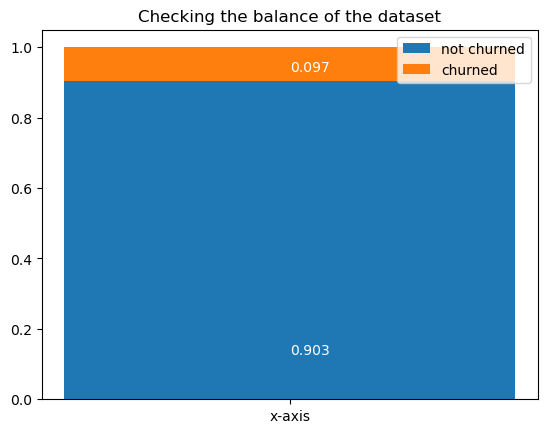

In [27]:
fig, ax = plt.subplots()
bottom = np.zeros(1)

values = {
    "not churned":np.array([client_df.churn.value_counts()[0] /(client_df.churn.value_counts()[0]+client_df.churn.value_counts()[1])]),
    "churned":np.array([client_df.churn.value_counts()[1] /(client_df.churn.value_counts()[0]+client_df.churn.value_counts()[1])])
}
bottom=[0]

for boolean, weight_count in values.items():
    print(boolean, weight_count)
    p = ax.bar(["x-axis"],weight_count, 0.5, label=boolean, bottom=bottom, align='center')
    ax.annotate(round(weight_count[0],3), ('x-axis',1-weight_count[0]+0.03), color='white') 
    bottom+=weight_count
ax.set_title("Checking the balance of the dataset")
ax.legend(loc='upper right')

##### There is a big impact due to imbalance data. So we will have to take care of this

<Axes: title={'center': 'Channel wise churn'}, xlabel='channel_sales'>

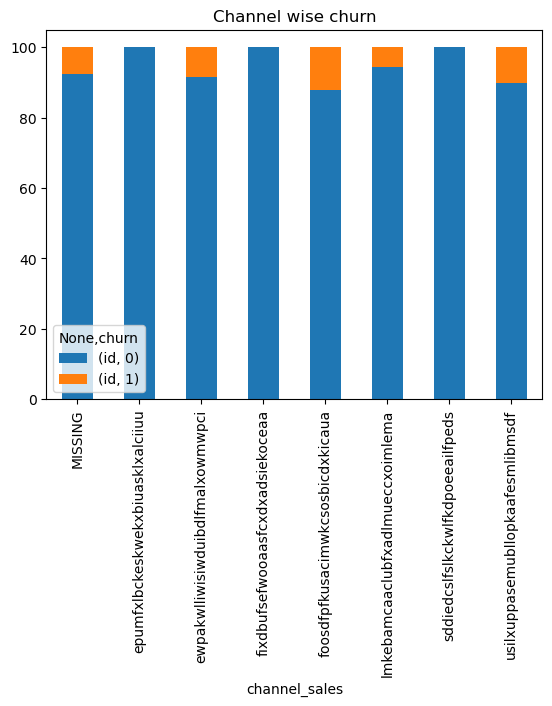

In [28]:
channel = client_df[['churn','id','channel_sales']].groupby(['channel_sales','churn']).count().unstack().fillna(0)
channel = channel.div(channel.sum(axis=1), axis=0).mul(100)
channel.plot(kind='bar', stacked=True, title='Channel wise churn')

##### We see that there are three sales channels from which we have not seen any customers churn

In [29]:
display(client_df[['churn','cons_12m']].groupby('churn').mean())
display(client_df[['churn','cons_gas_12m']].groupby('churn').mean())
display(client_df[['churn','cons_last_month']].groupby('churn').mean())

,cons_12m
churn,
0,167867.266550
1,78862.478506


,cons_gas_12m
churn,
0,30121.497308
1,9235.411557


,cons_last_month
churn,
0,17046.352089
1,7205.239605


<Axes: title={'center': 'num_years_antig wise churn'}, xlabel='num_years_antig'>

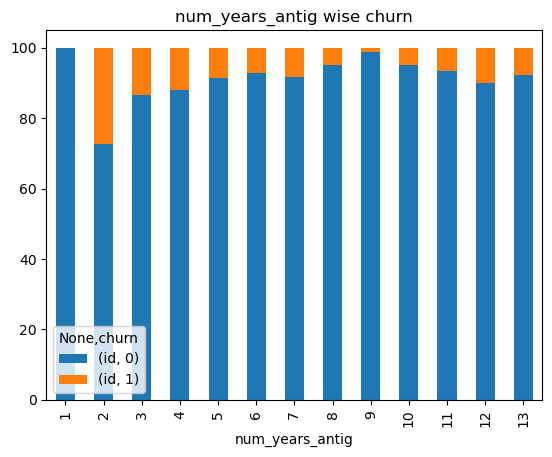

In [30]:
inter = client_df[['churn','id','num_years_antig']].groupby(['num_years_antig','churn']).count().unstack().fillna(0)
inter = inter.div(inter.sum(axis=1), axis=0).mul(100)
inter.plot(kind='bar', stacked=True, title='num_years_antig wise churn')

<Axes: title={'center': 'origin_up wise churn'}, xlabel='origin_up'>

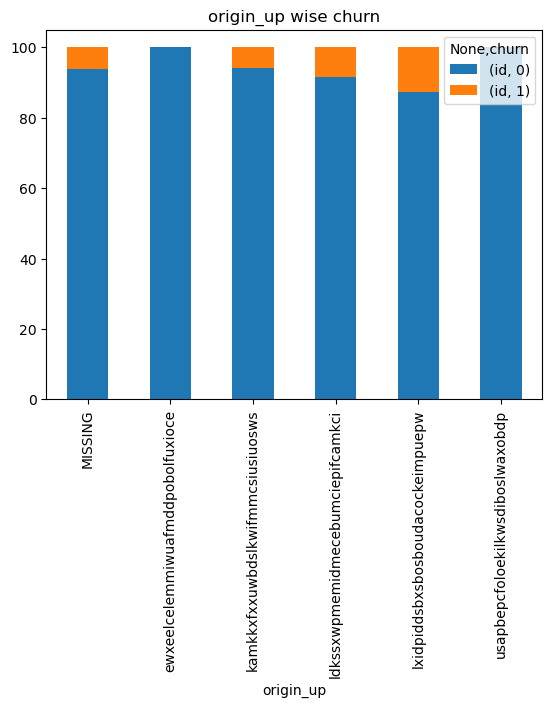

In [31]:
inter = client_df[['churn','id','origin_up']].groupby(['origin_up','churn']).count().unstack().fillna(0)
inter = inter.div(inter.sum(axis=1), axis=0).mul(100)
inter.plot(kind='bar', stacked=True, title='origin_up wise churn')

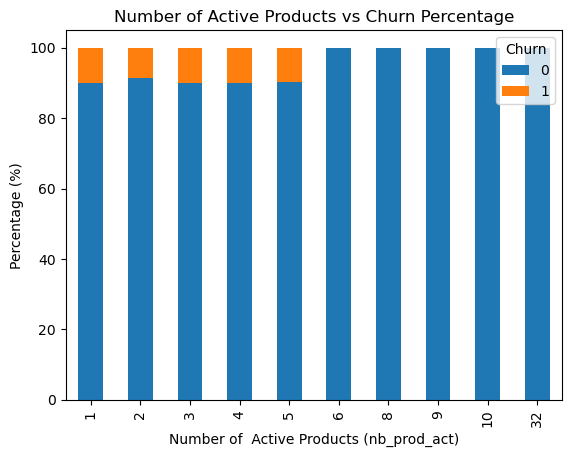

In [25]:
inter = client_df[['churn','id', 'nb_prod_act']].groupby(['nb_prod_act', 'churn']).size().unstack().fillna(0)

# Convert the counts to percentages
inter = inter.div(inter.sum(axis=1), axis=0).mul(100)

# Plotting the stacked bar chart
inter.plot(kind='bar', stacked=True)

# Adding a title and labels
plt.title('Number of Active Products vs Churn Percentage')
plt.xlabel('Number of  Active Products (nb_prod_act)')
plt.ylabel('Percentage (%)')

# Display the legend
plt.legend(title='Churn')

plt.show()

#### With increase in the number of active products we see the churn percent decrease and reach 0 from no of products as 6

<Axes: >

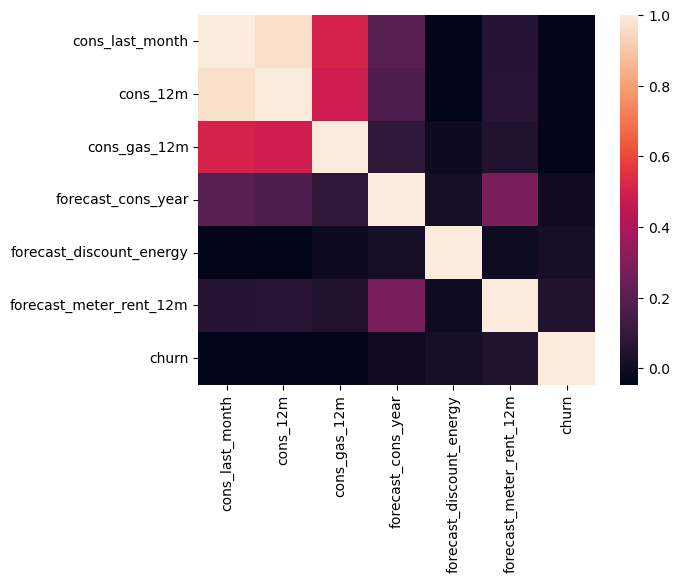

In [26]:
corr_matrix = client_df[['cons_last_month','cons_12m','cons_gas_12m','forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m','churn']].corr()
import seaborn as sns
sns.heatmap(corr_matrix)

In [32]:
from scipy import stats
def chi_test(data, col1, col2):
    # Create a contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])

    # Perform the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    # Display the results
    # print(f"Chi-square statistic: {chi2}")
    print(i,end=" ")
    print(f"P-value: {p}")
    # print(f"Degrees of freedom: {dof}")
    # print("Expected frequencies table:")
    # print(expected)

for i in client_df.columns:
    if(client_df[i].dtype=="object"):
        chi_test(client_df, i,'churn')

id P-value: 0.4961097296038193
channel_sales P-value: 1.7810651262162043e-19
date_activ P-value: 1.0373321423084612e-06
date_end P-value: 0.00011688416101657684
date_modif_prod P-value: 1.8933506129708566e-06
date_renewal P-value: 0.37708242139277387
has_gas P-value: 0.0036957589641509795
origin_up P-value: 9.298626414308622e-29


In [33]:
from scipy.stats import f_oneway
def anova_test(data, col1, col2):
    l=[]
    for i in data[col1].unique():
        l.append(np.array(data[data[col1]==i][col2]))
    sample1 , sample2 = l
    # Create a contingency table
    f_stat, pvalue = f_oneway(sample1, sample2)

    # Display the results
    # print(col2)
    # print(f"F statistic: {f_stat}")
    # if(pvalue>0.05):
    print(col2,end=" ")
    print(f"P-value: {pvalue}")
    # print(f"Degrees of freedom: {dof}")
    # print("Expected frequencies table:")
    # print(expected)

for i in client_df.columns:
    if(client_df[i].dtype=="int64" or client_df[i].dtype=="float64"):
        anova_test(client_df,'churn',i)

cons_12m P-value: 2.7301174281572555e-08
cons_gas_12m P-value: 4.463684101480176e-06
cons_last_month P-value: 4.370505348885808e-08
forecast_cons_12m P-value: 0.11760249762916793
forecast_cons_year P-value: 0.7572685030096329
forecast_discount_energy P-value: 0.03962341709870462
forecast_meter_rent_12m P-value: 8.82552534820188e-08
forecast_price_energy_off_peak P-value: 0.190313467267034
forecast_price_energy_peak P-value: 0.0003950816640921118
forecast_price_pow_off_peak P-value: 0.07410849761824921
imp_cons P-value: 0.8482681536969164
margin_gross_pow_ele P-value: 4.3925326518360605e-31
margin_net_pow_ele P-value: 4.111907812923543e-31
nb_prod_act P-value: 0.0711813795630325
net_margin P-value: 6.591892861450029e-07
num_years_antig P-value: 2.917436923936369e-19
pow_max P-value: 0.00024263242167906222
churn P-value: 0.0


C:\Users\MS\anaconda3\envs\data_mining\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Conclusion:
A lot of potential feature engineering tasks ahead to clean the dataset of outliers and skewness.
Datatypes of columns need to be changed from object type to date type
We see clear contribution in churn for few column value rather than others. This can be taken advantage of by the model.
There are some missing categorical values in the columns that need to be engineered too.